**OBLIGATORIO FINAL G445 - GRUPO 8**
<br>**INTEGRANTES:**
<br>
<br>*Theo Pereira, 5703834-3, theopereira2001@gmail.com*
<br>*Carlos Píriz, 4298784-4, piriz.carlos@gmail.com*
<br>*Gabriel	Better,3138871-2, gabrielbetter@gmail.com*


In [169]:
### Importacion de librerias ###

# Sistema
import os

# Tratamiento de datos
import pandas as pd
import numpy as np
import datetime as dt
import math

# Visualizacion 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**PARTE 1 OBTENCION DE DATOS Y ACERCAMIENTO**

*Carga de datos*

In [170]:
# Carga del archivo superstore a dataframe

superstore_url = 'https://raw.githubusercontent.com/carlos1680/obligatorioCPE/main/ObligatorioFinal/Superstore.csv'
superstore = pd.read_csv(superstore_url)
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.00",South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.00",South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs....,731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,"90,036.00",West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.00",South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,"9,575,775.00"
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.00",South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,"22,368.00"


*Verificación inicial*

In [171]:
# Verificacion rapida de valores numericos
superstore.describe()

,Row ID,Postal Code,Sales
count,"9,801.00","9,787.00","9,801.00"
mean,"4,901.00","55,273.50","103,324.01"
std,"2,829.45","32,040.47","521,944.06"
min,1.00,"1,040.00","-328,685.00"
25%,"2,451.00","23,223.00",52.20
50%,"4,901.00","58,103.00",589.41
75%,"7,351.00","90,008.00","45,344.00"
max,"9,800.00","99,301.00","23,962,656.00"


In [172]:
# Revision de las columnas
superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [173]:
# Tipos de datos de las columnas
superstore.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [174]:
# Cantidad filas, nulos columnas y tipos de datos
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9801 non-null   int64  
 1   Order ID       9801 non-null   object 
 2   Order Date     9801 non-null   object 
 3   Ship Date      9801 non-null   object 
 4   Ship Mode      9801 non-null   object 
 5   Customer ID    9801 non-null   object 
 6   Customer Name  9801 non-null   object 
 7   Segment        9801 non-null   object 
 8   Country        9798 non-null   object 
 9   City           9801 non-null   object 
 10  State          9801 non-null   object 
 11  Postal Code    9787 non-null   float64
 12  Region         9801 non-null   object 
 13  Product ID     9801 non-null   object 
 14  Category       9801 non-null   object 
 15  Sub-Category   9801 non-null   object 
 16  Product Name   9801 non-null   object 
 17  Sales          9801 non-null   float64
dtypes: float

In [175]:
# Cantidad de filas y columnas
superstore.shape

(9801, 18)

In [176]:
# Verificacion de dimensiones
superstore.ndim

2

**Acercamiento a los datos**

*Tratamos de indexar por 'Row ID', evaluando la columna*

In [177]:
# Tipo, cantidad y nulos general
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9801 non-null   int64  
 1   Order ID       9801 non-null   object 
 2   Order Date     9801 non-null   object 
 3   Ship Date      9801 non-null   object 
 4   Ship Mode      9801 non-null   object 
 5   Customer ID    9801 non-null   object 
 6   Customer Name  9801 non-null   object 
 7   Segment        9801 non-null   object 
 8   Country        9798 non-null   object 
 9   City           9801 non-null   object 
 10  State          9801 non-null   object 
 11  Postal Code    9787 non-null   float64
 12  Region         9801 non-null   object 
 13  Product ID     9801 non-null   object 
 14  Category       9801 non-null   object 
 15  Sub-Category   9801 non-null   object 
 16  Product Name   9801 non-null   object 
 17  Sales          9801 non-null   float64
dtypes: float

In [178]:
#Verificamos repetidos para esa columna.
superstore["Row ID"].duplicated(keep= 'first').value_counts()

Row ID
False    9800
True        1
Name: count, dtype: int64

In [179]:
# Consultamos las filas que tienen Row ID duplicados, los registros que quedan marcados como duplicados.
superstore.loc[superstore["Row ID"].duplicated(keep='first')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9800,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,"43,615.00",East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,"10,384.00"


In [180]:
# Para el Row ID duplicado encontrado, verificamos cuantas filas existen.
superstore.loc[superstore['Row ID']==9800]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,"43,615.00",East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,"10,384.00"
9800,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,"43,615.00",East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,"10,384.00"


In [181]:
# Vemos que el que esta duplicado por Row ID, tambien esta duplicado en sus valores segun fila
superstore.loc[superstore.duplicated(keep = 'first')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9800,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,"43,615.00",East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,"10,384.00"


*Eliminacion de fila duplicada*

In [182]:
# Vemos que aparte de repetir el valor  de Row ID, se repiten los valores para toda la fila, estaria duplicada, entonces borramos la fila
superstore.drop_duplicates(inplace = True, keep='first',ignore_index= False)
superstore.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9797 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9786 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float64(2)

*Indexación*

In [183]:
# Ahora que tiene valores distintos y sabemos que no tiene nulos, indexamos por Row ID
superstore.set_index('Row ID',drop = True, inplace = True)
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9797 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9786 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [184]:
# Visualizacion de muestra
superstore.sample(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
7420,US-2017-114013,13/03/2017,15/03/2017,Second Class,SC-20770,Stewart Carmichael,Corporate,United States,Philadelphia,Pennsylvania,"19,134.00",East,OFF-ST-10002574,Office Supplies,Storage,SAFCO Commercial Wire Shelving. Black,552.56
1304,US-2018-126179,03/07/2018,07/07/2018,Standard Class,CS-12460,Chuck Sachs,Consumer,United States,Columbus,Georgia,"31,907.00",South,FUR-FU-10002554,Furniture,Furnishings,Westinghouse Floor Lamp with Metal Mesh Shade....,23.99
1828,CA-2017-109344,08/02/2017,11/02/2017,Second Class,CH-12070,Cathy Hwang,Home Office,United States,Raleigh,North Carolina,"27,604.00",South,TEC-PH-10002624,Technology,Phones,Samsung Galaxy S4 Mini,"1,127,976.00"
3718,CA-2017-142370,19/09/2017,23/09/2017,Standard Class,TP-21130,Theone Pippenger,Consumer,United States,Columbus,Georgia,"31,907.00",South,OFF-SU-10003002,Office Supplies,Supplies,Letter Slitter,"45,387.00"
4497,CA-2018-112753,18/06/2018,23/06/2018,Standard Class,CC-12670,Craig Carreira,Consumer,United States,Los Angeles,California,"90,032.00",West,OFF-PA-10002036,Office Supplies,Paper,Xerox 1930,38.88
187,CA-2015-123260,26/08/2015,30/08/2015,Standard Class,FM-14290,Frank Merwin,Home Office,United States,Los Angeles,California,"90,032.00",West,TEC-AC-10002323,Technology,Accessories,SanDisk Ultra 32 GB MicroSDHC Class 10 Memory ...,176.80
9044,CA-2017-168830,07/11/2017,13/11/2017,Standard Class,ML-17395,Marina Lichtenstein,Corporate,United States,San Francisco,California,"94,122.00",West,TEC-AC-10003911,Technology,Accessories,NETGEAR AC1750 Dual Band Gigabit Smart WiFi Ro...,479.97
601,US-2017-100720,16/07/2017,21/07/2017,Standard Class,CK-12205,Chloris Kastensmidt,Consumer,United States,Philadelphia,Pennsylvania,"19,120.00",East,TEC-PH-10003963,Technology,Phones,GE 2-Jack Phone Line Splitter,"494,376.00"
8544,CA-2015-137575,06/08/2015,11/08/2015,Standard Class,TB-21625,Trudy Brown,Consumer,United States,New York City,New York,"10,035.00",East,TEC-AC-10004571,Technology,Accessories,Logitech G700s Rechargeable Gaming Mouse,199.98


**Analisis inicial, luego de indexar**

In [185]:
# Dimensiones de los datos
superstore.shape

(9800, 17)

In [186]:
# Dimension del dataframe
superstore.ndim

2

In [187]:
# Muestreo de datos
superstore.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.00",South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.00",South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs....,731.94
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,"90,036.00",West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.00",South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,"9,575,775.00"
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.00",South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,"22,368.00"


In [188]:
# Otro muestreo
superstore.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
5117,CA-2018-154137,11/11/2018,17/11/2018,Standard Class,MT-17815,Meg Tillman,Consumer,United States,New York City,New York,"10,009.00",East,OFF-ST-10003324,Office Supplies,Storage,Belkin OmniView SE Rackmount Kit,35.48
8926,CA-2017-168032,30/01/2017,03/02/2017,Standard Class,DF-13135,David Flashing,Consumer,United States,Rockford,Illinois,"61,107.00",Central,OFF-BI-10000546,Office Supplies,Binders,Avery Durable Binders,"1,728.00"
7471,CA-2016-100734,15/09/2016,20/09/2016,Standard Class,AC-10615,Ann Chong,Corporate,United States,Philadelphia,Pennsylvania,"19,143.00",East,OFF-BI-10002609,Office Supplies,Binders,Avery Hidden Tab Dividers for Binding Systems,"3,576.00"
5097,US-2015-140452,06/12/2015,10/12/2015,Standard Class,BK-11260,Berenike Kampe,Consumer,United States,Chicago,Illinois,"60,610.00",Central,FUR-FU-10002088,Furniture,Furnishings,Nu-Dell Float Frame 11 x 14 1/2,"10,776.00"
7665,CA-2015-151967,22/10/2015,26/10/2015,Standard Class,NB-18580,Nicole Brennan,Corporate,United States,Bossier City,Louisiana,"71,111.00",South,FUR-FU-10000193,Furniture,Furnishings,Tenex Chairmats For Use with Hard Floors,129.92


**Informacion de las columnas**

In [189]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9797 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9786 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [190]:
# Nuevamente descripcion de los valores de las columnas numericas
superstore.describe()

,Postal Code,Sales
count,"9,786.00","9,800.00"
mean,"55,274.69","103,333.49"
std,"32,041.89","521,969.85"
min,"1,040.00","-328,685.00"
25%,"23,223.00",52.15
50%,"58,103.00",588.69
75%,"90,008.00","45,344.00"
max,"99,301.00","23,962,656.00"


In [191]:
# Explicitamente, los tipos de datos de las columnas
superstore.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [192]:
# Verificacion de datos nulos por columnas, obtiene la cantidad de nulos por cada columna
superstore.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           3
City              0
State             0
Postal Code      14
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [193]:
#Verificacion de duplicados, segun la fila
superstore.duplicated().sum()

1

**CONCLUSIONES INICIALES**
<br>
Podriamos hacer varias transformaciones de tipo de datos segun los valores de las columnas.
<br>
Hay varias filas con columnas que tienen valores na, que podriamos tratar de resolverlas
<br>
Tenemos una fila duplicada, considerando toda la fila
<br>
Tenemos valores negativos para la columna Sales

**2 - TRATAMIENTO DE FILAS Y COLUMNAS - DATA CLEANING**

*Eliminacion de filas duplicadas*

In [194]:
#Eliminacion de duplicados
superstore.drop_duplicates(inplace = True, keep='first',ignore_index= True)
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9799 non-null   object 
 1   Order Date     9799 non-null   object 
 2   Ship Date      9799 non-null   object 
 3   Ship Mode      9799 non-null   object 
 4   Customer ID    9799 non-null   object 
 5   Customer Name  9799 non-null   object 
 6   Segment        9799 non-null   object 
 7   Country        9796 non-null   object 
 8   City           9799 non-null   object 
 9   State          9799 non-null   object 
 10  Postal Code    9785 non-null   float64
 11  Region         9799 non-null   object 
 12  Product ID     9799 non-null   object 
 13  Category       9799 non-null   object 
 14  Sub-Category   9799 non-null   object 
 15  Product Name   9799 non-null   object 
 16  Sales          9799 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


*Asignacion de valores correspondientes a los valores nulos de la columna Postal Code*

In [195]:
# Asignacion valores nulos de Postal Code, California -> 90036
condicion1 = superstore["State"].str.contains('california', case=False)
condicion2 = superstore["Postal Code"].isnull()
mask = (condicion1 & condicion2)
superstore.loc[mask,'Postal Code']= 90036


In [196]:
# Verificamos que los codigos de California no tiene mas nulos
superstore.loc[(mask)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,"90,036.00",West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,"1,706,184.00"


In [197]:
# Asignacion valores nulos de Postal Code, Ohio -> 44256
condicion1 = superstore["State"].str.contains('ohio', case=False)
condicion2 = superstore["Postal Code"].isnull()
mask = (condicion1 & condicion2)
superstore.loc[mask,'Postal Code'] = 44256


In [198]:
# Verificamos que los codigos de Ohio no tiene mas nulos
superstore.loc[(mask)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
114,CA-2015-115259,25/08/2015,27/08/2015,Second Class,RC-19960,Ryan Crowe,Consumer,United States,Columbus,Ohio,"44,256.00",East,OFF-EN-10002600,Office Supplies,Envelopes,Redi-Strip #10 Envelopes. 4 1/8 x 9 1/2,4.72


In [199]:
# Asignacion valores nulos de Postal Code, Pennsyilvania -> 19140
condicion1 = superstore["State"].str.contains('pennsylvania', case=False)
condicion2 = superstore["Postal Code"].isnull()
mask = (condicion1 & condicion2)
superstore.loc[mask, 'Postal Code'] = 19140

In [200]:
# Verificamos que los codigos de Pennsylvania no tiene mas nulos
superstore.loc[(mask)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
30,US-2016-150630,17/09/2016,21/09/2016,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,"19,140.00",East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,"3,264.00"


In [201]:
# Asignacion valores nulos de Postal Code, nulos restantes -> 0
superstore.fillna({'Postal Code': '0'},inplace= True)

In [202]:
# Verificacion de que Postal Code, no tiene mas nulos
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9799 non-null   object 
 1   Order Date     9799 non-null   object 
 2   Ship Date      9799 non-null   object 
 3   Ship Mode      9799 non-null   object 
 4   Customer ID    9799 non-null   object 
 5   Customer Name  9799 non-null   object 
 6   Segment        9799 non-null   object 
 7   Country        9796 non-null   object 
 8   City           9799 non-null   object 
 9   State          9799 non-null   object 
 10  Postal Code    9799 non-null   object 
 11  Region         9799 non-null   object 
 12  Product ID     9799 non-null   object 
 13  Category       9799 non-null   object 
 14  Sub-Category   9799 non-null   object 
 15  Product Name   9799 non-null   object 
 16  Sales          9799 non-null   float64
dtypes: float64(1), object(16)
memory usage: 1.3+ MB


**Columna Country**

*Tratamiento de nulos*

In [203]:
superstore["Country"].unique()

array(['United States', nan], dtype=object)

In [204]:
condicion1 = superstore["Country"].isnull()
superstore.loc[condicion1]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
213,CA-2016-146262,02/01/2016,09/01/2016,Standard Class,VW-21775,Victoria Wilson,Corporate,NaN,Medina,Ohio,"44,256.00",East,FUR-BO-10004695,Furniture,Bookcases,O'Sullivan 2-Door Barrister Bookcase in Odessa...,452.45
260,CA-2018-163139,01/12/2018,03/12/2018,Second Class,CC-12670,Craig Carreira,Consumer,NaN,New York City,New York,"10,009.00",East,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,17.52
261,US-2018-155299,08/06/2018,12/06/2018,Standard Class,Dl-13600,Dorris liebe,Corporate,NaN,Pasadena,Texas,"77,506.00",Central,OFF-AP-10002203,Office Supplies,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,"1,624.00"


In [205]:
# Asignacion valores nulos de Country, nulos restantes -> 'United States'
superstore.fillna({'Country': 'United States'},inplace= True)

In [206]:
# Verificacion de que la columna Country no tiene mas nulos
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9799 non-null   object 
 1   Order Date     9799 non-null   object 
 2   Ship Date      9799 non-null   object 
 3   Ship Mode      9799 non-null   object 
 4   Customer ID    9799 non-null   object 
 5   Customer Name  9799 non-null   object 
 6   Segment        9799 non-null   object 
 7   Country        9799 non-null   object 
 8   City           9799 non-null   object 
 9   State          9799 non-null   object 
 10  Postal Code    9799 non-null   object 
 11  Region         9799 non-null   object 
 12  Product ID     9799 non-null   object 
 13  Category       9799 non-null   object 
 14  Sub-Category   9799 non-null   object 
 15  Product Name   9799 non-null   object 
 16  Sales          9799 non-null   float64
dtypes: float64(1), object(16)
memory usage: 1.3+ MB


**Asignacion de tipos de datos a las columnas**

In [207]:
# Listado general de tipos de datos e las columnas
superstore.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

*Conversion de tipo fecha para las columnas que almacenarian fechas*

In [208]:
# Se cambia el tipo de datos de Order Date a fecha
superstore["Order Date"] = pd.to_datetime(superstore["Order Date"],format='%d/%m/%Y')

In [209]:
# Se cambia el tipo de datos de Ship Date a fecha
superstore["Ship Date"] = pd.to_datetime(superstore["Ship Date"], format='%d/%m/%Y')

*Para las variables NO ORDINALES, las clasificamos con el tipo de dato: CATEGORY*

In [210]:
superstore["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [211]:
superstore["Ship Mode"]= superstore["Ship Mode"].astype('category')

*Para este caso NO vemos la necesidad de separar los datos del campo Customer ID, lo tratamos como CATEGORY*

In [212]:
superstore["Customer ID"].unique()

array(['CG-12520', 'DV-13045', 'SO-20335', 'BH-11710', 'AA-10480',
       'IM-15070', 'HP-14815', 'PK-19075', 'AG-10270', 'ZD-21925',
       'KB-16585', 'SF-20065', 'EB-13870', 'EH-13945', 'TB-21520',
       'MA-17560', 'GH-14485', 'SN-20710', 'LC-16930', 'RA-19885',
       'ES-14080', 'ON-18715', 'PO-18865', 'LH-16900', 'DP-13000',
       'JM-15265', 'TB-21055', 'KM-16720', 'PS-18970', 'BS-11590',
       'KD-16270', 'HM-14980', 'JE-15745', 'KB-16600', 'SC-20770',
       'DN-13690', 'JC-16105', 'CS-12400', 'PG-18895', 'GM-14455',
       'JS-15685', 'KB-16315', 'RB-19705', 'PN-18775', 'KD-16345',
       'ER-13855', 'RB-19465', 'GZ-14470', 'LC-16870', 'JM-15250',
       'PA-19060', 'CV-12805', 'CL-12565', 'RC-19960', 'DK-13090',
       'GG-14650', 'SC-20725', 'AD-10180', 'PF-19165', 'TS-21610',
       'LS-16975', 'DW-13585', 'LC-16885', 'JD-15895', 'SH-19975',
       'SG-20080', 'HA-14920', 'MG-17680', 'JE-16165', 'TW-21025',
       'SP-20650', 'NK-18490', 'DB-13060', 'NP-18670', 'TT-210

In [213]:
superstore["Customer ID"]= superstore["Customer ID"].astype('category')

In [214]:
superstore["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [215]:
superstore["Category"]= superstore["Category"].astype('category')

In [216]:
superstore["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [217]:
superstore["Sub-Category"]= superstore["Sub-Category"].astype('category')

In [218]:
superstore["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [219]:
superstore["Segment"]= superstore["Segment"].astype('category')

In [220]:
superstore["Country"].unique()

array(['United States'], dtype=object)

In [221]:
superstore["Country"]= superstore["Country"].astype('category')

In [222]:
superstore["City"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [223]:
superstore["City"]= superstore["City"].astype('category')

In [224]:
superstore["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [225]:
superstore["State"]= superstore["State"].astype('category')

In [226]:
superstore["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [227]:
superstore["Region"]= superstore["Region"].astype('category')

In [228]:
superstore["Product ID"].unique()

array(['FUR-BO-10001798', 'FUR-CH-10000454', 'OFF-LA-10000240', ...,
       'TEC-MA-10003589', 'OFF-AP-10003099', 'TEC-PH-10002645'],
      dtype=object)

In [229]:
superstore["Product ID"]= superstore["Product ID"].astype('category')

**Tratamiento de los valores negativos de la columna Sales**

In [230]:
# Verificamos la cantidad de valores negativos en Sales
condicion1 = superstore["Sales"]<0
superstore.loc[(condicion1)]["Sales"].size

41

*Opcion 1 , que podria distorsionar los resultados*

In [231]:
"""
def  mediaCantidad(fila):
    
    if (fila["Sales"]<0):
        filtroSegmento = superstore["Segment"] == fila["Segment"]
        filtroPais = superstore["Country"] == fila["Country"]
        filtroRegion = superstore["Region"] == fila["Region"]
        filtroCiudad = superstore["City"] == fila["City"]
        filtroEstado = superstore["State"] == fila["State"]
        filtroCategoria = superstore["Category"] == fila["Category"]
        filtroSubCategoria = superstore["Sub-Category"] == fila["Sub-Category"]
        filtroProducto = superstore["Product ID"] == fila["Product ID"]
        
        mediaCantidad = superstore.loc[(filtroSegmento & filtroPais & filtroRegion & filtroCiudad & filtroEstado & filtroCategoria & filtroSubCategoria & filtroProducto),"Sales"].mean(skipna=True).astype('float')
        #mediaCantidad = superstore.loc[(filtroProducto),"Sales"].mean(skipna=True).astype('float')
        print(mediaCantidad)
        return mediaCantidad
    else:
        return fila["Sales"]

ventas = superstore.apply(mediaCantidad,axis='columns')
#ventas
superstore["Sales"]=ventas
"""

'\ndef  mediaCantidad(fila):\n    \n    if (fila["Sales"]<0):\n        filtroSegmento = superstore["Segment"] == fila["Segment"]\n        filtroPais = superstore["Country"] == fila["Country"]\n        filtroRegion = superstore["Region"] == fila["Region"]\n        filtroCiudad = superstore["City"] == fila["City"]\n        filtroEstado = superstore["State"] == fila["State"]\n        filtroCategoria = superstore["Category"] == fila["Category"]\n        filtroSubCategoria = superstore["Sub-Category"] == fila["Sub-Category"]\n        filtroProducto = superstore["Product ID"] == fila["Product ID"]\n        \n        mediaCantidad = superstore.loc[(filtroSegmento & filtroPais & filtroRegion & filtroCiudad & filtroEstado & filtroCategoria & filtroSubCategoria & filtroProducto),"Sales"].mean(skipna=True).astype(\'float\')\n        #mediaCantidad = superstore.loc[(filtroProducto),"Sales"].mean(skipna=True).astype(\'float\')\n        print(mediaCantidad)\n        return mediaCantidad\n    else:\n

*Opcion 2 , eliminar los registros que en Sales tengan valor negativo.*

In [232]:

#superstore.drop(superstore[(superstore["Sales"]<0)].index,inplace = True)

*Opcion 3, suponiendo que por error el sistema los tomo negativos y deberian ser positivos*

In [233]:
# Cambio de valores negativos a positivos y verificacion
condicion1 = superstore["Sales"] < 0
mask = (condicion1)
superstore.loc[mask, 'Sales'] = superstore["Sales"]*(-1)
superstore.describe()

,Order Date,Ship Date,Sales
count,9799,9799,"9,799.00"
mean,2017-05-01 07:02:29.525461760,2017-05-05 06:06:30.162261504,"104,942.62"
min,2015-01-03 00:00:00,2015-01-07 00:00:00,0.99
25%,2016-05-24 12:00:00,2016-05-28 00:00:00,54.91
50%,2017-06-26 00:00:00,2017-06-29 00:00:00,626.10
75%,2018-05-15 00:00:00,2018-05-19 00:00:00,"45,387.00"
max,2018-12-30 00:00:00,2019-01-05 00:00:00,"23,962,656.00"
std,NaN,NaN,"521,668.63"


In [234]:
#Muestreo
superstore.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.00",South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.00",South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs....,731.94
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,"90,036.00",West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.00",South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,"9,575,775.00"
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.00",South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,"22,368.00"


**Punto 3 - Cambio de nombre de columna Order ID y cambio de tipo de datos en columna Postal Code**

In [235]:
# Renombrar la columna Order ID por Numero de Orden
superstore = superstore.rename(columns={'Order ID': 'Numero de Orden'})

# Cambiar el tipo de datos de la columna 'Postal code' a int
superstore['Postal Code'] = superstore['Postal Code'].astype(int)

#vemos que se hayan aplicado bien los cambios

superstore.info()
superstore.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Numero de Orden  9799 non-null   object        
 1   Order Date       9799 non-null   datetime64[ns]
 2   Ship Date        9799 non-null   datetime64[ns]
 3   Ship Mode        9799 non-null   category      
 4   Customer ID      9799 non-null   category      
 5   Customer Name    9799 non-null   object        
 6   Segment          9799 non-null   category      
 7   Country          9799 non-null   category      
 8   City             9799 non-null   category      
 9   State            9799 non-null   category      
 10  Postal Code      9799 non-null   int32         
 11  Region           9799 non-null   category      
 12  Product ID       9799 non-null   category      
 13  Category         9799 non-null   category      
 14  Sub-Category     9799 non-null   categor

Index(['Numero de Orden', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

**Punto 4 - Creacion de columna Year_orderdate y month_orderdate**

In [236]:
#Nuevas columnas: Year_orderdate y month_orderdate y asignacion de valores correspondientes

superstore['month_orderdate'] = superstore['Order Date'].dt.month
superstore['Year_orderdate']  = superstore['Order Date'].dt.year

superstore.head(10)

,Numero de Orden,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,month_orderdate,Year_orderdate
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,11,2017
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs....,731.94,11,2017
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,6,2017
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,"9,575,775.00",10,2016
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,"22,368.00",10,2016
5,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,6,2015
6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28,6,2015
7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,"907,152.00",6,2015
8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,"18,504.00",6,2015
9,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90,6,2015


**5 Respuestas a preguntas**

*Punto (a): Cual es el número de consumidores por segmento?*

In [237]:
# Agrupar por 'Segment' y contar el número de consumidores únicos en 'Customer Name'

numero_consumidores_por_segmento = pd.DataFrame(superstore.groupby('Segment', observed = False)['Customer Name'].nunique())
numero_consumidores_por_segmento

# nunique() para contar los valores únicos en la columna "Customer Name" para cada segmento
# unique() traeria los nombres de los elementos, y no el numero de elementos para cada segmento 

,Customer Name
Segment,
Consumer,409
Corporate,236
Home Office,148


*Punto (b): Identifique el ID de consumidor, su nombre, segmento y total de ordenes solo para aquellos clientes que tienen mas de una orden.*

In [238]:
#AGRUPAR POR ID, NAME Y SEGMENTO. ADEMAS CONTAR PARA CADA AGRUPACION LA CANTIDAD DE ORDENES

# Obtenemos los datos agrupados, en forma da DataFrame
ej_5_b = pd.DataFrame(superstore.groupby(['Customer ID', 'Customer Name', 'Segment'], observed=True)['Numero de Orden'].nunique()).reset_index()
#Cambiamos el tipo de nombre de columna
ej_5_b['Numero de Orden'] = ej_5_b['Numero de Orden'].astype('int')
ej_5_b = ej_5_b.rename(columns={'Numero de Orden': 'Cantidad de Ordenes'})
# Condicion de filtrado
condicion1 = ej_5_b['Cantidad de Ordenes'] > 1
# Contraejemplos
# US-2018-169551
# condicion2 = ej_5_b["Numero de Orden"] =='US-2018-169551'
# condicion3 = ej_5_b["Customer ID"].str.contains('RL-19615', case=False)
mask = (condicion1)
# Mostramos los datos correspondientes , filtrado y ordenados (los primeros )
ej_5_b.loc[mask].sort_values(
    by='Cantidad de Ordenes', ascending=False).head(15)

,Customer ID,Customer Name,Segment,Cantidad de Ordenes
275,EP-13915,Emily Phan,Consumer,17
791,ZC-21910,Zuschuss Carroll,Consumer,13
147,CK-12205,Chloris Kastensmidt,Consumer,13
591,PG-18820,Patrick Gardner,Consumer,13
356,JE-15745,Joel Eaton,Consumer,13
175,CS-12250,Chris Selesnick,Corporate,12
597,PK-19075,Pete Kriz,Consumer,12
34,AH-10690,Anna Häberlin,Corporate,12
576,NS-18640,Noel Staavos,Corporate,12
99,BP-11095,Bart Pistole,Corporate,12


*Punto (c). Identifique los ID de clientes de aquellos 10 que gastaron mas (columna sales)*

In [239]:
ej_5_c = pd.DataFrame(superstore.groupby('Customer ID', observed = False)['Sales'].sum())    #AGRUPAMOS POR ID DE CLIENTE Y SUMAMOS CANTIDAD QUE GASTARON(SALES) POR CLIENTE
ej_5_c = ej_5_c.sort_values(by='Sales', ascending=False).head(10)                    #ORDENAMOS DE MAYOR A MENOS Y TOMAMOS LOS 10 PRIMEROS
ej_5_c

,Sales
Customer ID,
AG-10675,"24,891,993.60"
CM-12715,"14,793,181.50"
AH-10465,"13,603,184.85"
PO-18850,"12,647,643.53"
EP-13915,"11,562,352.22"
TA-21385,"11,512,942.74"
HM-14860,"10,233,352.39"
SO-20335,"10,191,793.01"
CC-12670,"9,992,482.07"


*Punto (d). Cual es el número de consumidores por ciudad?*

In [240]:
#NUMERO DE CONSUMIDORES POR CIUDAD:
ej_5_d = pd.DataFrame(superstore.groupby('City', observed = False)['Customer ID'].nunique()).sort_values(by='Customer ID', ascending=False)
ej_5_d


,Customer ID
City,
New York City,349
Los Angeles,300
Philadelphia,237
San Francisco,230
Seattle,187
...,...
Pine Bluff,1
Conway,1
Conroe,1


*Punto (e). Cual es el total vendido por cada año?*

In [241]:
ej_5_e= pd.DataFrame(superstore.groupby("Year_orderdate")["Sales"].sum())
ej_5_e['Sales'] = ej_5_e['Sales'].apply(lambda x: '{:.0f}'.format(x)) #CAMBIAR NOTACION CIENTIFICA A NOTACION NORMAL (EN LA COLUMNA "Sales") 
ej_5_e.sort_values(by='Sales',ascending= False)

,Sales
Year_orderdate,
2018,325431197
2017,284860371
2016,226839278
2015,191201918


**6. Visualización**

*a. Grafique las ventas por categoría en un grafico de torta, cada categoría deberá figurar con el porcentaje correspondiente que representa del total.*

In [242]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Numero de Orden  9799 non-null   object        
 1   Order Date       9799 non-null   datetime64[ns]
 2   Ship Date        9799 non-null   datetime64[ns]
 3   Ship Mode        9799 non-null   category      
 4   Customer ID      9799 non-null   category      
 5   Customer Name    9799 non-null   object        
 6   Segment          9799 non-null   category      
 7   Country          9799 non-null   category      
 8   City             9799 non-null   category      
 9   State            9799 non-null   category      
 10  Postal Code      9799 non-null   int32         
 11  Region           9799 non-null   category      
 12  Product ID       9799 non-null   category      
 13  Category         9799 non-null   category      
 14  Sub-Category     9799 non-null   categor

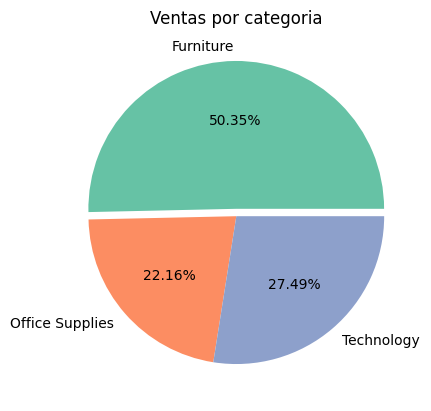

In [243]:
a = superstore.groupby("Category", observed=False)["Sales"].sum() #observed=False es por una adevertencia de version de pandas
# Crear el pie chart
a.plot.pie(
    autopct='%1.2f%%',                                              # Formato decimal de los valores
    explode=[0.05, 0, 0],                                           # Padding de las porciones
    colors=sns.color_palette('Set2')                                # Paleta de colores
)
plt.title("Ventas por categoria")                                   # Titulo del grafico
plt.ylabel('')                                                      # Eliminar la etiqueta del eje y

plt.show()

*b. Grafique las ventas por región utilizando barras.*

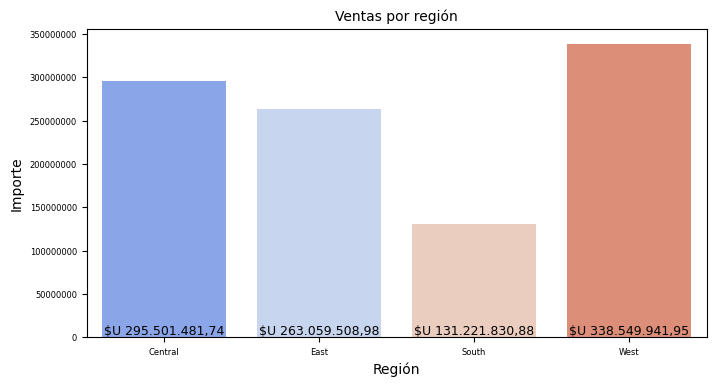

In [244]:
from matplotlib.ticker import FuncFormatter
from babel.numbers import format_currency


#Funcion para formatear los valores

def format(x):

    return format_currency(x, currency="$U", locale="es_UY")    


# Datos a graficar

# Agrupa por region la suma de Sales

mi_data = superstore[['Region','Sales']].groupby(by=['Region'], observed = True ).agg(

    {'Sales':'sum'}

).reset_index()


plt.figure(figsize=(8, 4))  # Establecemos un tamaño, escala para el grafico

# Configuramos el grafico, para que muestre por region los importes, separando por region
grf = sns.barplot(data=mi_data, x=("Region"), y=("Sales"),
                  hue="Region", errorbar=None, palette="coolwarm")

plt.title("Ventas por región", fontsize=10)      # Titulo del grafico
plt.xlabel("Región", fontsize=10)                # Titulo del eje x
plt.ylabel("Importe", fontsize=10)               # Titulo del eje y

# Formateo de los valores para el eje y
plt.gca().ticklabel_format(axis='y', style='plain')


# Tamaño de las referencias de los valores de x e y
plt.tick_params(labelsize=6)
# Iteramos en los valores del dataframe para personalizar como se muestra
for index, row in mi_data.iterrows():
    # Seteamos el texto, redondeando los valores y formateandolso con la funcion definida previamente, damos formato c donde mostrar y tamaño de fuente por ejemplo.
    grf.text(row.name, index, format(round(row['Sales'], 2)), color='black',
             horizontalalignment='center', verticalalignment='center', va='bottom', fontsize=9)

c. *Grafique las ventas del año 2018 colocando la fecha en el eje x y las ventas en el eje y. Utilice un
gráfico de lineas.*


In [245]:
sales_2018 = superstore[superstore["Year_orderdate"]==2018] #creamos df donde el año de venta sea 2018

In [246]:
sales_2018 = sales_2018.groupby("Order Date")["Sales"].sum().reset_index()
# agrupamos ventas por dia

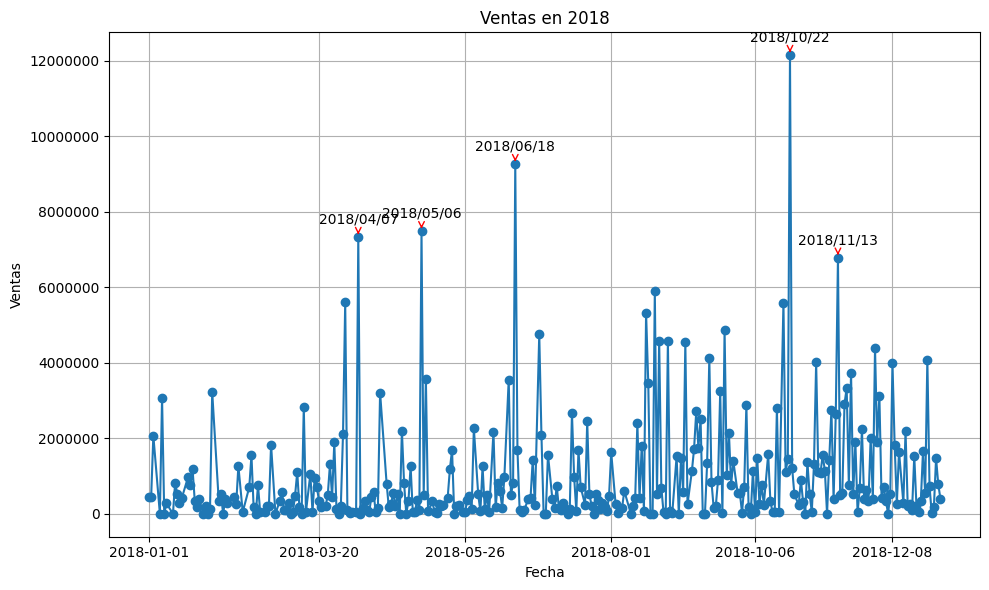

In [247]:
# Ordena el DF por la columna de fechas
sales_2018 = sales_2018.sort_values('Order Date')

# Grafica los datos
plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
plt.plot(sales_2018['Order Date'], sales_2018['Sales'], marker='o')

# Personalización del gráfico
plt.title('Ventas en 2018')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)  # Agregar cuadrícula


# Mostrar solo una etiqueta por cada 60 días en el eje x y rotar las etiquetas del eje x para mayor claridad
plt.xticks(sales_2018['Order Date'][::60], rotation=0)

# Encontrar los cinco puntos más altos de y
top5_indices = sales_2018['Sales'].nlargest(5).index

# Formateo de los valores para el eje y
plt.gca().ticklabel_format(axis='y', style='plain')

# Marcar los valores de x en los cinco puntos más altos de y
for i in top5_indices:
    plt.annotate(f'{sales_2018["Order Date"].iloc[i].strftime("%Y/%m/%d")}',            # Con esto formateamos el valor de x, correspondiente a la fecha
                 (sales_2018['Order Date'].iloc[i], sales_2018['Sales'].iloc[i]),       # Le pasamos las cooordenadas del punto, segun los indices previamente obtenidos correspondiente
                 textcoords="offset points", xytext=(0,10), ha='center',                # Opciones de visualizacion
                 arrowprops=dict(arrowstyle="->", color='red'))                         # Definimos el estilo de la marca
# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas
plt.show()

**Parte 7**

*Se quiere realizar un descuento a un número reducido de clientes.
a. Utilizando el dataset costumer_discount muestre el siguiente detalle: el ID del cliente, su
nombre, categoría, el total de ventas, el descuento y las ventas con el descuento aplicado.*

*Obtencion y carga de los datos de los descuentos*

In [248]:
# discount = pd.read_csv(miPath+"/Customer_discount.csv")
# #discount = pd.read_csv("Customer_discount.csv")
# discount.head(2)

#url_discounts = 'https://raw.githubusercontent.com/bolso1899/TrabajoFinalCPE/main/Customer_discount.csv'
url_discounts = 'https://raw.githubusercontent.com/carlos1680/obligatorioCPE/main/ObligatorioFinal/Customer_discount.csv'
discount = pd.read_csv(url_discounts)
discount.sort_values(by='Customer ID')

,Customer ID,Customer Name,Discount
3,AS-10135,Adrian Shami,0.10
5,AS-10285,Alejandro Savely,0.20
0,CG-12520,Claire Gute,0.10
11,CJ-12010,Caroline Jumper,0.10
10,CS-12490,Cindy Schnelling,0.15
1,GG-14650,Greg Guthrie,0.15
6,GZ-14470,Gary Zandusky,0.20
8,KH-16360,Katherine Hughes,0.12
2,LC-16885,Lena Creighton,0.20
7,PO-19195,Phillina Ober,0.15


In [249]:
pd.options.display.float_format = '{:,.2f}'.format                                                  # Formateamos los valores 
seleccion = ['Customer ID', 'Customer Name','Category', 'Sales', 'Discount', 'Sales_discounted']    # Lista de columnas a seleccionar
agrupamiento = ['Customer ID', 'Customer Name', 'Category']                                         # Lista de columnas a agrupar
joined = superstore.merge(discount, how='left', on=['Customer ID'], suffixes=('', '_d'))            # Unimos los dataframes
joined['Sales_discounted'] = np.where(joined.Discount.isnull(                                       # Seteamos las ventas segun el descuento, en caso de que no tenga descuento, ponemos el valor de la venta original
), joined.Sales, (joined.Sales-(joined.Sales*joined.Discount)))
condicion1 = joined['Discount'].isna()                                                              #Establecemos el criterio de filtrado en aquellos que NO tengan descuento asignado

joined[(~condicion1)][seleccion].groupby(agrupamiento, observed=True, dropna=True).agg({            # Filtramos por el opuesto de los que NO tengan descuento, agrupamos y sumamos. Ordenando y devolviendo Dataframe con columnas
    'Sales': 'sum',
    'Discount': 'max',
    'Sales_discounted': 'sum'
}).sort_values(by=(['Customer ID', 'Customer Name','Category','Sales']), ascending = [True,True,True,False]).reset_index()

,Customer ID,Customer Name,Category,Sales,Discount,Sales_discounted
0,AS-10135,Adrian Shami,Furniture,4.18,0.10,3.76
1,AS-10135,Adrian Shami,Office Supplies,54.64,0.10,49.18
2,AS-10285,Alejandro Savely,Furniture,"2,888.82",0.20,"2,311.06"
3,AS-10285,Alejandro Savely,Office Supplies,"134,206.96",0.20,"107,365.57"
4,AS-10285,Alejandro Savely,Technology,"140,300.00",0.20,"112,240.00"
5,CG-12520,Claire Gute,Furniture,"132,369.90",0.10,"119,132.91"
6,CG-12520,Claire Gute,Office Supplies,"5,362.16",0.10,"4,825.94"
7,CJ-12010,Caroline Jumper,Furniture,"3,402,461.60",0.10,"3,062,215.44"
8,CJ-12010,Caroline Jumper,Office Supplies,"501,724.32",0.10,"451,551.89"
9,CJ-12010,Caroline Jumper,Technology,"44,191.90",0.10,"39,772.71"


## Alguna conclusiones del análisis:  
+ La mayor cantidad de consumidores es enfoca la tenemos en el segmento: Consumer
+ Los clientes que tienen mayor cantidad de ordenes, no necesariamente son los que mas gastan
+ El mayor número de consumidores ocurrió en la ciudad de Nueva York
+ Desde el 2015 al 2018, el importe de las ventas ha sido creciente cada año
+ La categoria que mejor utilidades deja es la de Furniture, siendo cerca del 50%
+ La region West(Oeste) es la mas rentable en cuanto a ventas, mientra que la region South(Sur) es la de menor rentabilidad
+ En 2018, el mayor pico de ventas ocurrio en el mes de Octubre